# CAP 4611: Homework 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Part I: Neural Network Components From Scratch
### A: Activation Functions 
Here, we will create two popular activation functions, sigmoid and ReLU, from scratch.

In [ ]:
# Returns element-wise sigmoid
def sigmoid (x):
    return 1.0 / (1 + np.exp(-x))

# Returns element x_i in x if x_i > 0
def relu (x):
    return np.abs(x * 1.0 * (x > 0))

Now, we can compute the derivatives of each of these functions.

In [ ]:
def sigmoid_prime (x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu_prime (x):
    return 1.0 * (x > 0)

Let's test this on the set of values [-10,-1,0,1,10], and see what the results are.

In [ ]:
lst = [-10,-1,0,1,10]
print('Original List: {0}\n'.format(lst))

sig_lst = [sigmoid(i) for i in lst]
print('Sigmoid on List: {0}'.format(sig_lst))

sig_prime_lst = [sigmoid_prime(i) for i in lst]
print('Derivative of Sigmoid on List: {0}\n'.format(sig_prime_lst))

relu_lst = [relu(i) for i in lst]
print('ReLU on List: {0}'.format(relu_lst))

relu_prime_lst = [relu_prime(i) for i in lst]
print('Derivative of ReLU on List: {0}'.format(relu_prime_lst))

Original List: [-10, -1, 0, 1, 10]

Sigmoid on List: [4.5397868702434395e-05, 0.2689414213699951, 0.5, 0.7310585786300049, 0.9999546021312976]
Derivative of Sigmoid on List: [4.5395807735951673e-05, 0.19661193324148185, 0.25, 0.19661193324148185, 4.5395807735907655e-05]

ReLU on List: [0.0, 0.0, 0.0, 1.0, 10.0]
Derivative of ReLU on List: [0.0, 0.0, 0.0, 1.0, 1.0]


### B: Loss Function
Let's see what a loss function would look like. For this, we'll use binary cross-entropy loss.

In [ ]:
# BCEL with output y and target t
def binary_cross_entropy_loss (y, t):
    return (-t * np.log2(y) - (1 - t) * np.log2(1 - y)).mean()

Let's do some tests on pairs of labels and network outputs:

In [ ]:
# Label: 0, Output: 0.1
print('Label = 0, Out = 0.1: Loss = {0}'.format(binary_cross_entropy_loss(0.1,0)))
# Label: 1, Output: 0.5
print('Label = 1, Out = 0.5: Loss = {0}'.format(binary_cross_entropy_loss(0.5,1)))
# Label: 1, Output: 0.999
print('Label = 1, Out = 0.999: Loss = {0}'.format(binary_cross_entropy_loss(0.999,1)))

Label = 0, Out = 0.1: Loss = 0.15200309344504997
Label = 1, Out = 0.5: Loss = 1.0
Label = 1, Out = 0.999: Loss = 0.0014434168696687186


## Part II: Neural Network in Keras
Now, using a synthetic dataset, we will train different networks on that data.

### A: The Dataset

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=2, n_features=2)

# Seperates the data by class
a = X[y == 1]
b = X[y == 0]

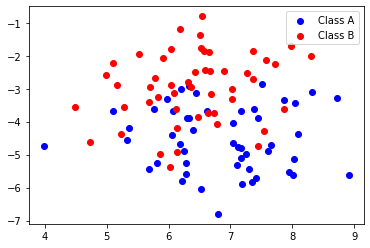

In [ ]:
# Plots the data
fig, ax = plt.subplots()
ax.scatter(a[:,0],a[:,1],color='blue',label='Class A')
ax.scatter(b[:,0],b[:,1],color='red',label='Class B')
plt.legend()
plt.show()

### B: Neural Network
Using Keras, now we will create neural networks to distinguish between the classes.

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras import optimizers
from keras import layers

First, let's attempt to create an extremely simple model, which only has some barebones features. 

In [ ]:
# Creates the model
model = Sequential()
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
# Splits the data into a training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

model.fit(X_train,y_train,epochs=500,batch_size=50)

Epoch 1/500
2/2 [==============================] - 0s 2ms/step - loss: 2.6759 - accuracy: 0.5000
Epoch 2/500
2/2 [==============================] - 0s 1ms/step - loss: 2.6642 - accuracy: 0.5000
Epoch 3/500
2/2 [==============================] - 0s 2ms/step - loss: 2.6522 - accuracy: 0.5000
Epoch 4/500
2/2 [==============================] - 0s 1ms/step - loss: 2.6410 - accuracy: 0.5000
Epoch 5/500
2/2 [==============================] - 0s 2ms/step - loss: 2.6292 - accuracy: 0.5000
Epoch 6/500
2/2 [==============================] - 0s 2ms/step - loss: 2.6175 - accuracy: 0.5000
Epoch 7/500
2/2 [==============================] - 0s 2ms/step - loss: 2.6054 - accuracy: 0.5000
Epoch 8/500
2/2 [==============================] - 0s 1ms/step - loss: 2.5942 - accuracy: 0.5000
Epoch 9/500
2/2 [==============================] - 0s 1ms/step - loss: 2.5823 - accuracy: 0.5000
Epoch 10/500
2/2 [==============================] - 0s 2ms/step - loss: 2.5707 - accuracy: 0.5000
Epoch 11/500
2/2 [===========

What if a second layer was added onto the model? Let's create a network that uses a multi-layer composition and see how that affects performance.

In [ ]:
# Creates the model
new_model = Sequential()
new_model.add(layers.Dense(4, activation='relu'))
new_model.add(layers.Dense(1, activation='sigmoid'))
new_model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

new_model.fit(X_train,y_train,epochs=500,batch_size=50)

Epoch 1/500
2/2 [==============================] - 0s 2ms/step - loss: 1.4541 - accuracy: 0.3125
Epoch 2/500
2/2 [==============================] - 0s 2ms/step - loss: 1.4447 - accuracy: 0.3125
Epoch 3/500
2/2 [==============================] - 0s 1ms/step - loss: 1.4361 - accuracy: 0.3125
Epoch 4/500
2/2 [==============================] - 0s 1ms/step - loss: 1.4263 - accuracy: 0.3125
Epoch 5/500
2/2 [==============================] - 0s 1ms/step - loss: 1.4167 - accuracy: 0.3000
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 1.4076 - accuracy: 0.2875
Epoch 7/500
2/2 [==============================] - 0s 2ms/step - loss: 1.3974 - accuracy: 0.3000
Epoch 8/500
2/2 [==============================] - 0s 1ms/step - loss: 1.3894 - accuracy: 0.3000
Epoch 9/500
2/2 [==============================] - 0s 3ms/step - loss: 1.3799 - accuracy: 0.3000
Epoch 10/500
2/2 [==============================] - 0s 2ms/step - loss: 1.3717 - accuracy: 0.3000
Epoch 11/500
2/2 [===========

Through testing, the models tend to perform similarly on easilly seperable data. However, in this case, the multi-layered model was able to better distinguish between classes that are not so-easilly seperable.This shows how a simple change can greatly impact the performance of a neural network.